In [458]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [459]:
data_df = pd.read_excel("Final Dataset.xlsx")

In [460]:
data_df.Is_it_routed_through_TPA.value_counts()

1    322
0    177
Name: Is_it_routed_through_TPA, dtype: int64

In [461]:
X_features = list( data_df.columns )
X_features.remove( 'Is_it_routed_through_TPA')
X_features.remove( 'UHID Number')
X_features.remove('Policy number')
X_features.remove('Policy CSL/Max Limit')
X_features.remove('Claim Amount')

In [462]:
encoded_data_df = pd.get_dummies( data_df[X_features], drop_first = True )
list(encoded_data_df.columns)

['Main Hospital Expenses(y/n)',
 'Pre& Post hospital Expense (y/n)',
 'Gender ',
 'Age',
 'Are you previously covered by any insurance',
 'No of days admitted',
 'Disease (y/n)',
 'Expenses',
 'Are you  covered by any top policy',
 'Are you covered in any other Mediclaim/Helath Insurance',
 'Annual Premium',
 'Does the insurer have internal Claim Process(Y/N)',
 'Is the Hospital partnered with the Insurance company',
 'Name of the Hospital_BAPTIST HEALTH MEDICAL CENTER - LR',
 'Name of the Hospital_BAPTIST MEDICAL CENTER SOUTH',
 'Name of the Hospital_CALLAHAN EYE FOUNDATION HOSP',
 'Name of the Hospital_COOPER GREEN MERCY HOSPITAL',
 'Name of the Hospital_DCH REGIONAL MEDICAL CENTER',
 'Name of the Hospital_HUNTSVILLE HOSPITAL',
 'Name of the Hospital_INFIRMARY WEST',
 'Name of the Hospital_MOBILE INFIRMARY MEDICAL CENTER',
 'Name of the Hospital_PRINCETON BAPTIST MEDICAL CENTER',
 'Name of the Hospital_PROVIDENCE ALASKA MEDICAL CENTER',
 'Name of the Hospital_PROVIDENCE HOSPITAL',
 '

# Logistic Regression

In [463]:
Y = data_df.Is_it_routed_through_TPA
X = sm.add_constant( encoded_data_df )

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [465]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.511130
         Iterations 7


In [466]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                      Results: Logit
===========================================================================================================================
Model:                                Logit                                    Pseudo R-squared:                 0.226     
Dependent Variable:                   Is_it_routed_through_TPA                 AIC:                              436.7690  
Date:                                 2021-10-22 19:42                         BIC:                              590.9719  
No. Observations:                     349                                      Log-Likelihood:                   -178.38   
Df Model:                             39                                       LL-Null:                          -230.43   
Df Residuals:                         309                                      LLR p-value:                      7.7673e-08
Converged:                            1.0000                                   Scale:                            1.0000    
No. Iterations:                       7.0000                                                                               
---------------------------------------------------------------------------------------------------------------------------
                                                           Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------------------------------------------------------
const                                                      2.9958        1.1820  2.5344 0.0113         0.6790        5.3125
Main Hospital Expenses(y/n)                                0.1012        0.3906  0.2591 0.7956        -0.6643        0.8667
Pre& Post hospital Expense (y/n)                           0.1073        0.3206  0.3346 0.7379        -0.5210        0.7356
Gender                                                     0.5048        0.2782  1.8145 0.0696        -0.0405        1.0501
Age                                                       -0.0061        0.0088 -0.6977 0.4854        -0.0233        0.0111
Are you previously covered by any insurance                0.0030        0.2753  0.0110 0.9912        -0.5365        0.5425
No of days admitted                                       -0.0032        0.0330 -0.0959 0.9236        -0.0678        0.0615
Disease (y/n)                                             -0.2532 12682061.7623 -0.0000 1.0000 -24856384.5570 24856384.0506
Expenses                                                   0.0001        0.0004  0.2866 0.7745        -0.0006        0.0008
Are you  covered by any top policy                        -0.2767        0.2778 -0.9961 0.3192        -0.8211        0.2677
Are you covered in any other Mediclaim/Helath Insurance   -0.7424        0.2883 -2.5746 0.0100        -1.3075       -0.1772
Annual Premium                                             0.0003        0.0002  1.3590 0.1741        -0.0001        0.0008
Does the insurer have internal Claim Process(Y/N)         -1.6418        0.2904 -5.6529 0.0000        -2.2110       -1.0725
Is the Hospital partnered with the Insurance company      -1.3831        0.2883 -4.7966 0.0000        -1.9482       -0.8179
Name of the Hospital_BAPTIST HEALTH MEDICAL CENTER - LR   -0.0503        1.0025 -0.0502 0.9600        -2.0151        1.9145
Name of the Hospital_BAPTIST MEDICAL CENTER SOUTH         -0.7533        1.0493 -0.7179 0.4728        -2.8100        1.3034
Name of the Hospital_CALLAHAN EYE FOUNDATION HOSP         -0.0574        0.9275 -0.0619 0.9506        -1.8754        1.7605
Name of the Hospital_COOPER GREEN MERCY HOSPITAL           0.1949        0.8962  0.2174 0.8279        -1.5616        1.9513
Name of the Hospital_DCH REGIONAL MEDICAL CENTER          -0.0693        0.8606 -0.0806 0.9358        -1.7561        1.6174
Name of the Hospital_HUNTSVILLE HOSPIT

In [467]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [468]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['const',
 'Are you covered in any other Mediclaim/Helath Insurance',
 'Does the insurer have internal Claim Process(Y/N)',
 'Is the Hospital partnered with the Insurance company']

In [469]:
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.554990
         Iterations 6


In [470]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                            Results: Logit
=======================================================================================================
Model:                        Logit                              Pseudo R-squared:           0.159     
Dependent Variable:           Is_it_routed_through_TPA           AIC:                        395.3832  
Date:                         2021-10-22 19:42                   BIC:                        410.8035  
No. Observations:             349                                Log-Likelihood:             -193.69   
Df Model:                     3                                  LL-Null:                    -230.43   
Df Residuals:                 345                                LLR p-value:                7.6533e-16
Converged:                    1.0000                             Scale:                      1.0000    
No. Iterations:               6.0000                                                                   
-------------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------------------------
const                                                    2.4126   0.3015  8.0033 0.0000  1.8218  3.0035
Are you covered in any other Mediclaim/Helath Insurance -0.6300   0.2496 -2.5243 0.0116 -1.1192 -0.1408
Does the insurer have internal Claim Process(Y/N)       -1.4381   0.2521 -5.7034 0.0000 -1.9323 -0.9439
Is the Hospital partnered with the Insurance company    -1.3733   0.2574 -5.3343 0.0000 -1.8779 -0.8687
=======================================================================================================

"""

In [471]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) 
                          } )
y_pred_df.head(10)

,actual,predicted_prob
460,1,0.738720
73,1,0.585292
231,1,0.856021
175,1,0.585292
237,0,0.263323
425,0,0.856021
155,1,0.856021
55,1,0.856021
322,0,0.726024
9,1,0.856021


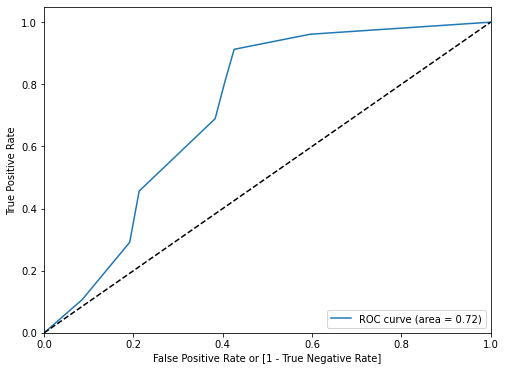

auc_score: 0.72


In [472]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 2 ))

In [473]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
69,1,0.600925,1
137,0,0.263323,0
225,1,0.600925,1
82,1,0.726024,1
245,0,0.263323,0
76,0,0.401610,0
278,1,0.738720,1
471,1,0.585292,1
469,0,0.856021,1
131,0,0.263323,0


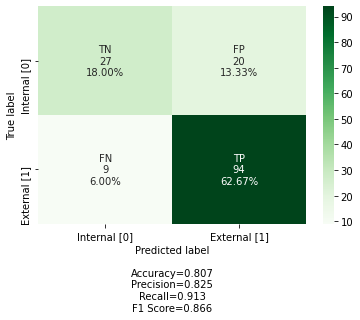

In [474]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["Internal [0]","External [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Decision Tree

In [475]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],'max_depth': range(2,10)}]

clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [476]:
clf.best_score_

0.7451132201132202

In [477]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [478]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=2)

In [479]:
tree_predict = clf_tree.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(150, 2)

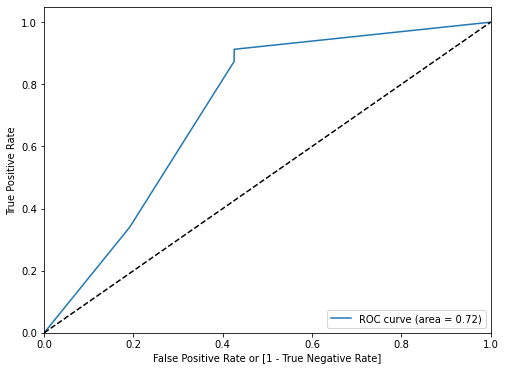

In [480]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

In [481]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

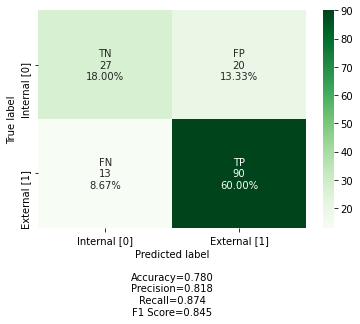

In [482]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["Internal [0]","External [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [483]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree, out_file = "tree.odt", feature_names = X_train.columns, 
                 class_names= ['Internal', 'External'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'tree.odt' )
chd_tree_graph.write_jpg( 'tree.png' )

True

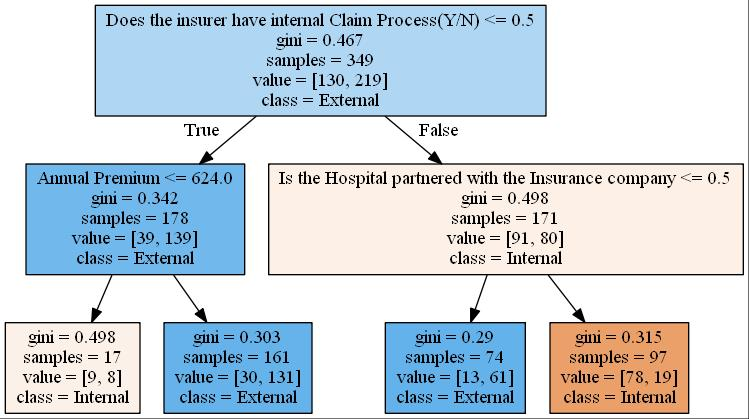

In [484]:
Image(filename='tree.png')

# Naive Bayes Classifier

In [485]:
gnb = GaussianNB().fit(X_train, y_train)

In [486]:
gnb_predict = gnb.predict_proba( X_test )
gnb_predict = pd.DataFrame(gnb_predict)[1]
gnb_predict = gnb_predict.to_numpy()

y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": gnb_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(150, 2)

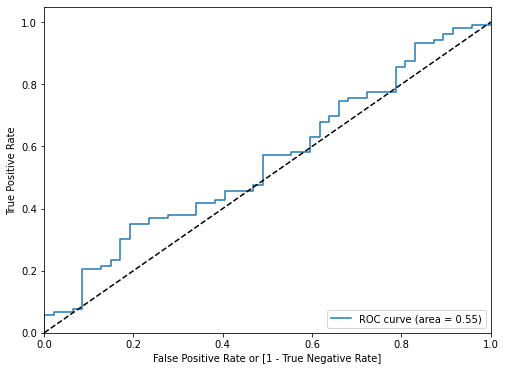

In [487]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

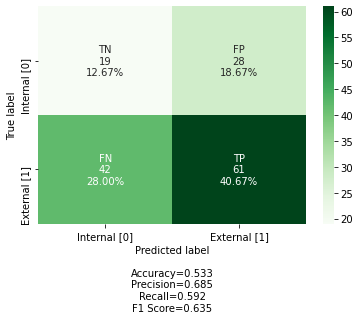

In [488]:
y_pred_df['gnb_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.gnb_predict)
labels = ["TN","FP","FN","TP"]
categories = ["Internal [0]","External [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Random Forest

In [489]:
from sklearn.ensemble import RandomForestClassifier

In [490]:
## Initializing the Random Forest Classifier with max_dept and n_estimators
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10)
radm_clf.fit( X_train, y_train )

RandomForestClassifier(max_depth=10, n_estimators=10)

In [491]:
rf_predict = radm_clf.predict_proba( X_test )
rf_predict = pd.DataFrame(rf_predict)[1]
rf_predict = rf_predict.to_numpy()

In [492]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": rf_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
460,1,0.500760
73,1,0.479464
231,1,0.882353
175,1,0.598186
237,0,0.400000
425,0,0.888462
155,1,0.875000
55,1,0.684295
322,0,0.568460
9,1,0.988462


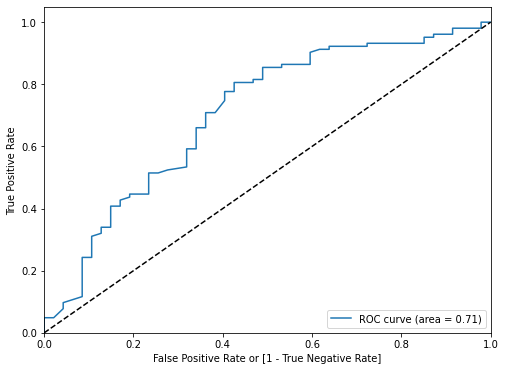

0.7055360462714316

In [493]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

In [494]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

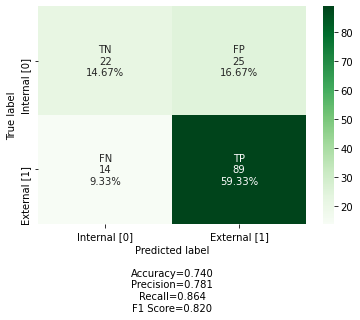

In [495]:
# Confusion matrix
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["Internal [0]","External [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Adaboost

In [496]:
## Importing Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

## Importing Logistic regression
from sklearn.linear_model import LogisticRegression

## Initializing logistic regression to use as base classifier
logreg_clf = LogisticRegression()

## Initilizing adaboost classifier with 50 classifers
ada_clf = AdaBoostClassifier(logreg_clf, n_estimators=50)

## Fitting adaboost model to training set
ada_clf.fit(X_train, y_train )

AdaBoostClassifier(base_estimator=LogisticRegression())

In [497]:
ada_predict = ada_clf.predict_proba( X_test )
ada_predict = pd.DataFrame(ada_predict)[1]
ada_predict = ada_predict.to_numpy()

In [498]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": ada_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
460,1,0.504371
73,1,0.503182
231,1,0.510727
175,1,0.499511
237,0,0.494447
425,0,0.511070
155,1,0.508706
55,1,0.508033
322,0,0.505808
9,1,0.509674


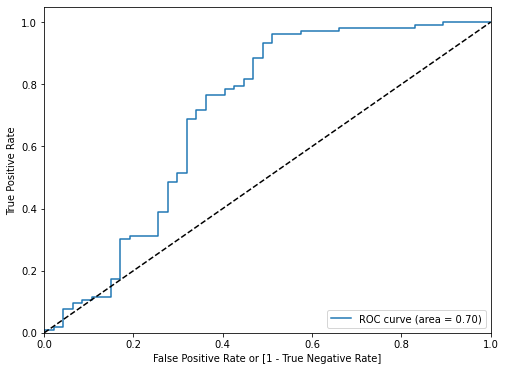

0.7037802107002685

In [499]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

In [500]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

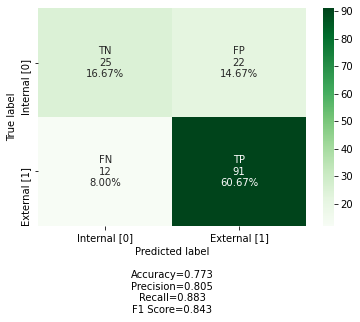

In [501]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["Internal [0]","External [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Gradient Boosting

In [502]:
# Gradient Boosting
## Importing Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

## Initializing Gradient Boosting with 500 estimators and max depth as 10.
gboost_clf = GradientBoostingClassifier( n_estimators=500, max_depth=10)

## Fitting gradient boosting model to training set
gboost_clf.fit(X_train, y_train )

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [503]:
gra_predict = gboost_clf.predict_proba( X_test )
gra_predict = pd.DataFrame(gra_predict)[1]
gra_predict = gra_predict.to_numpy()

In [504]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": gra_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
460,1,3.504295e-01
73,1,1.000000e+00
231,1,9.988817e-01
175,1,1.000000e+00
237,0,2.827370e-22
425,0,1.000000e+00
155,1,7.607598e-15
55,1,1.000000e+00
322,0,1.000000e+00
9,1,1.000000e+00


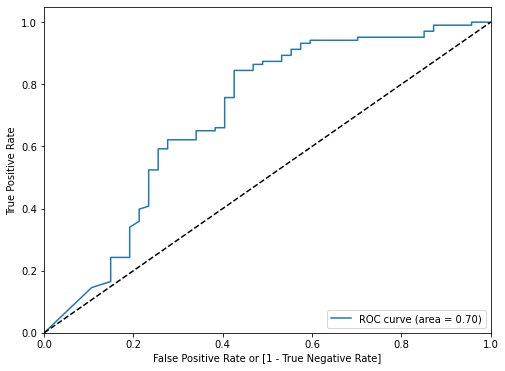

0.7010948151208427

In [505]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

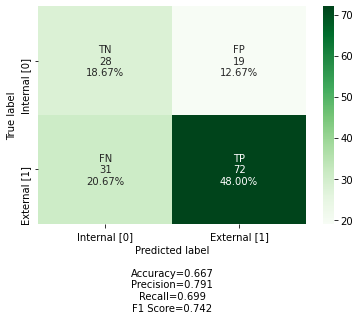

In [506]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["Internal [0]","External [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Bagging

In [507]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(n_estimators=100,max_samples=0.9)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(max_samples=0.9, n_estimators=100)

In [508]:
bag_predict = bagging_clf.predict_proba( X_test )
bag_predict = pd.DataFrame(bag_predict)[1]
bag_predict = bag_predict.to_numpy()

In [509]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": bag_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.head(10)

,actual,predicted_prob
460,1,0.67
73,1,0.91
231,1,0.87
175,1,0.87
237,0,0.01
425,0,0.88
155,1,0.80
55,1,0.73
322,0,0.94
9,1,0.81


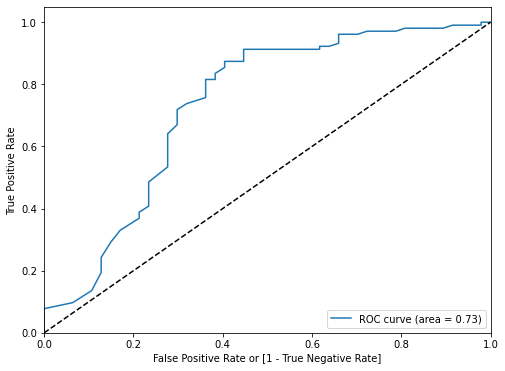

0.7329064242925015

In [510]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test AUC
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)

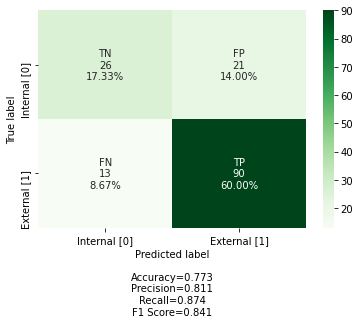

In [511]:
y_pred_df['pred_y'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred_df.pred_y)
labels = ["TN","FP","FN","TP"]
categories = ["Internal [0]","External [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Summary of Results